# Criando Modelos

Neste notebook, usarei os dados que passaram por resample para treinar os modelos de árvore e de kneighbors.

Vamos começar importando os dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
credit_tl = pd.read_csv('credit_tl.csv')
credit_st = pd.read_csv('credit_st.csv')
credit_test = pd.read_csv('credit_teste.csv')

temos que eliminar a coluna Unnamed: 0, poderíamos ter usado-a como índice durante a exportação.

In [ ]:
credit_tl.drop(columns = [credit_tl.columns[0],credit_tl.columns[1]], inplace = True)
credit_tl.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.941057,0.415781,-0.512265,3.933421,0.514942,0.609816,0.031752,0.017980,-0.297818,1.195182,...,-0.413795,-0.863268,0.209640,-0.750306,-0.010171,-0.217146,-0.004938,-0.051292,1,0
1,-0.850710,-0.372685,2.699431,-1.682590,-1.550600,-0.346184,-0.200263,0.185216,-0.708083,-0.238393,...,-0.073513,-0.046036,0.006349,0.369625,-0.019782,1.012083,-0.031982,0.071517,1,0
2,0.603151,-0.682241,-0.259877,1.998890,-0.221818,-0.291492,0.736498,-0.298385,-0.633175,0.325693,...,0.096216,-0.396078,-0.441605,-0.018673,0.483193,1.011707,-0.154060,0.055141,1,0
3,1.069103,-0.040292,1.437476,2.879854,-0.785455,0.818819,-0.799661,0.438085,0.709929,0.389435,...,0.029056,0.399293,-0.078798,0.084000,0.487789,0.248265,0.054261,0.019949,1,0
4,1.948773,-0.322793,-1.117147,0.270697,0.199565,0.140961,-0.215924,0.026514,0.443915,0.214834,...,0.014251,0.080068,0.157960,0.256118,-0.162430,0.200563,-0.049039,-0.054160,1,0


In [ ]:
credit_tl.Amount.isna().sum() # não ha valores nulos

0

In [ ]:
X_tl, y_tl = credit_tl.iloc[:,:-2],credit_tl.iloc[:,-1]

In [ ]:
credit_st.drop(columns = [credit_st.columns[0],credit_st.columns[1]], inplace = True)
credit_st.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.941057,0.415781,-0.512265,3.933421,0.514942,0.609816,0.031752,0.017980,-0.297818,1.195182,...,-0.413795,-0.863268,0.209640,-0.750306,-0.010171,-0.217146,-0.004938,-0.051292,1,0
1,-0.850710,-0.372685,2.699431,-1.682590,-1.550600,-0.346184,-0.200263,0.185216,-0.708083,-0.238393,...,-0.073513,-0.046036,0.006349,0.369625,-0.019782,1.012083,-0.031982,0.071517,1,0
2,0.603151,-0.682241,-0.259877,1.998890,-0.221818,-0.291492,0.736498,-0.298385,-0.633175,0.325693,...,0.096216,-0.396078,-0.441605,-0.018673,0.483193,1.011707,-0.154060,0.055141,1,0
3,1.069103,-0.040292,1.437476,2.879854,-0.785455,0.818819,-0.799661,0.438085,0.709929,0.389435,...,0.029056,0.399293,-0.078798,0.084000,0.487789,0.248265,0.054261,0.019949,1,0
4,1.948773,-0.322793,-1.117147,0.270697,0.199565,0.140961,-0.215924,0.026514,0.443915,0.214834,...,0.014251,0.080068,0.157960,0.256118,-0.162430,0.200563,-0.049039,-0.054160,1,0


In [ ]:
credit_st.Amount.isna().sum() # não há valores Nan

0

In [ ]:
credit_st.dropna(inplace=True)

In [ ]:
credit_st.Amount.isna().sum() # não há valores Nan

0

In [ ]:
X_st, y_st = credit_st.iloc[:,:-2],credit_st.iloc[:,-1]

In [ ]:
credit_test.Amount.isna().sum() # não ha valores Nan

0

In [ ]:
credit_test.drop(columns = [credit_test.columns[0],credit_test.columns[1]], inplace = True)

In [ ]:
X_test, y_test = credit_test.iloc[:,:-2],credit_test.iloc[:,-1]

In [ ]:
#Criando função para plotar matriz de confusão
def plot_matriz_conf(y, y_hat):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_hat)
    sns.heatmap(cm, annot=True)
    plt.ylabel('Rótulos verdadeiros')
    plt.xlabel('Rótulos previstos')
    plt.xticks([.5,1.5],['Não Houve fraude','houve fraude'], rotation=0)
    plt.yticks([0.5,1.5],['Não Houve fraude','houve fraude'],rotation=0)
    plt.title('Matriz de Confusão')

# Testando um modelo de Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


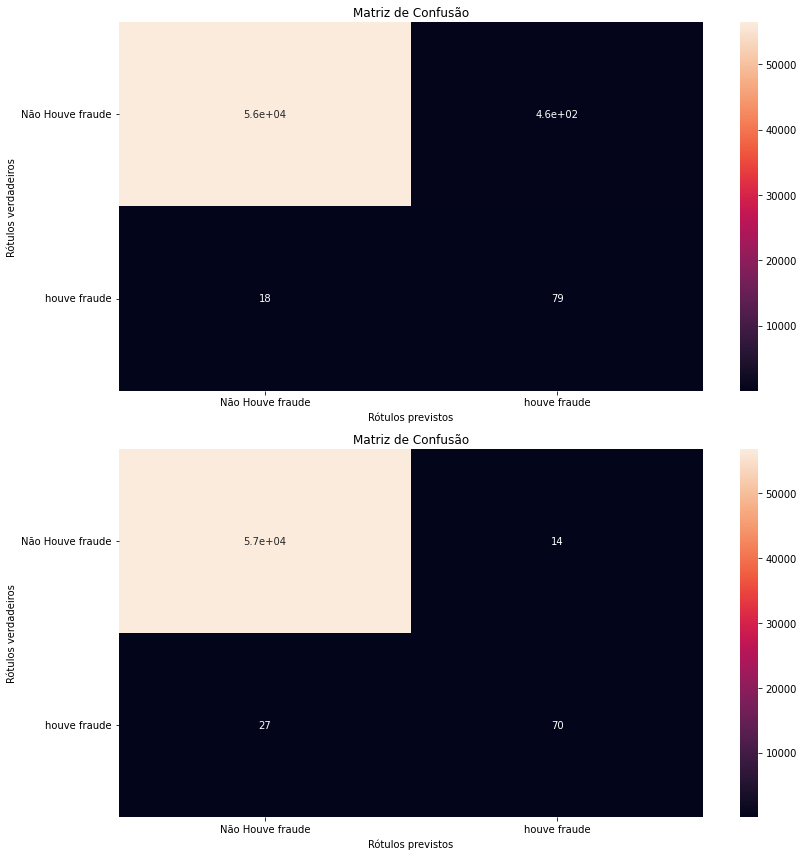

In [ ]:
params = {'max_depth':[2,4,6,8,10], 'criterion':['gini','entropy'],'splitter':['best','random']} #Parâmetros para testar
lista_modelo = [(X_st,y_st),(X_tl,y_tl)]
modelo = []
fig = plt.figure(figsize = (12,12))

for i in range(len(lista_modelo)):  
    tree_clf = DecisionTreeClassifier()
    tree_grid = GridSearchCV(tree_clf,params,verbose=1,cv=5)
    tree_grid.fit(lista_modelo[i][0], lista_modelo[i][1])
    modelo.append(tree_grid)          #Guarda o melhor modelo
    y_hat = tree_grid.predict(X_test) #Prevê os rótulos para o conjunto de testes
    fig.add_subplot(210+i+1)
    plot_matriz_conf(y_test, y_hat)   #Plota a matriz de confusão do melhor modelo
  
fig.tight_layout()
plt.show()

### Modelo Tree
A primeira matriz de confusão foi obtida do modelo treinado com os dados que passaram po SMOTETomek, o modelo apresenta excelente acurácia, isso é comum em conjuntos desbalanceados, o modelo é muito bom em prever a classe majoritária, falha, porém, em prever quando há fraude. O recall obtido nesse primeiro modelo foi de 81,44%. Neste projeto tomaremos como desafio melhorar o recall, pois outras etapas podem ser aplicadas depois para filtrar falsos verdadeiros.

A segunda matriz corresponde ao modelo treinado no conjunto de dados que passaram por Tomek apenas. Ela obteve uma alta precisão, mas perdeu em recall.


*   Precisão: 83,33%
*   Recall: 72,16%

Como queremos melhorar o recall, o primeiro modelo de árvore é melhor.



# Testando KNeighbors






In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


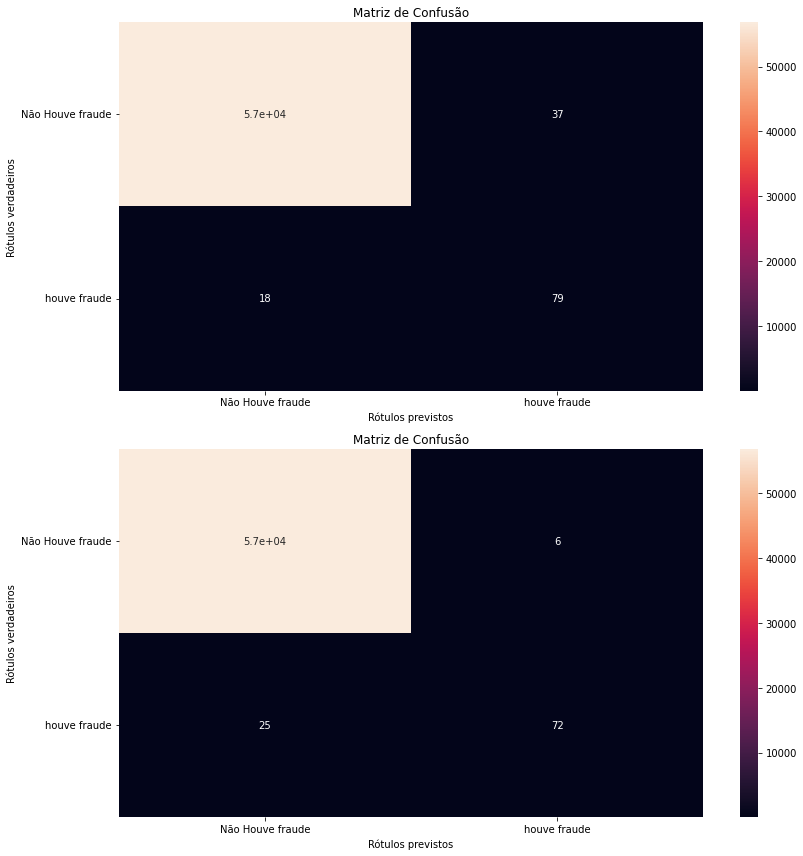

In [ ]:
params = {'n_neighbors': [ 4, 5, 6, 7, 8]} #Parâmetros para testar
lista_modelo2 = [(X_st,y_st),(X_tl,y_tl)]
modelo2 = []
fig = plt.figure(figsize=(12,12))

for i in range(len(lista_modelo2)):  
    knn_clf = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn_clf, params, verbose=1, cv=3)
    knn_grid.fit(lista_modelo2[i][0], lista_modelo2[i][1])
    modelo2.append(knn_grid)  #Guarda o melhor modelo
    y_hat = knn_grid.predict(X_test) #Prevê os rótulos para o conjunto de testes
    fig.add_subplot(210+i+1)
    plot_matriz_conf(y_test, y_hat)   #Plota a matriz de confusão do melhor modelo

fig.tight_layout()
plt.show()

### Modelo Kneighbors

Os dois fits do modelo foram superiores a árvore de decisão. O modelo para SMOTETomek foi muito superior a sua contraparte do modelo tree, o número de falsos positivos caiu de 460 para 37. O recall foi o mesmo para os dois modelos, porém o salto de qualidade na precisão do modelo torna o modelo de Kneighbors melhor no conjunto de dados SMOTETomek.

* Precisão: 68,10%
* Recall: 81,44%

O uso de TomekLinks ajudou o modelo a ter uma melhor precisão, dessa vez errou apenas 6 vezes quando disse que houve fraude. No geral o modelo performa bem, mas vamos tentar obter melhores recalls com redes neurais.

* Precisão: 92,3%
* Recall: 72,2%